In [1]:
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd, gluon, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

In [2]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
# = = 
features = nd.random.normal(shape=(n_train + n_test, 1))
poly_features = nd.concat(features, nd.power(features, 2), nd.power(features, 3))

labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1] + 
         true_w[2] * poly_features[:, 2] + true_b)

labels += nd.random.normal(scale=0.1, shape=labels.shape)

In [3]:
poly_features[:3], labels[:3]

(
 [[1.1630785  1.3527517  1.5733565 ]
  [0.4838046  0.2340669  0.11324265]
  [0.29956347 0.08973827 0.02688231]]
 <NDArray 3x3 @cpu(0)>, 
 [10.534649   5.530093   5.1570797]
 <NDArray 3 @cpu(0)>)

In [4]:
help(d2l.plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Return a subplot axes at the given grid position.
    
    Call signature::
    
       subplot(nrows, ncols, index, **kwargs)
    
    In the current figure, create and return an `.Axes`, at position *index*
    of a (virtual) grid of *nrows* by *ncols* axes.  Indexes go from 1 to
    ``nrows * ncols``, incrementing in row-major order.
    
    If *nrows*, *ncols* and *index* are all less than 10, they can also be
    given as a single, concatenated, three-digit number.
    
    For example, ``subplot(2, 3, 3)`` and ``subplot(233)`` both create an
    `.Axes` at the top right corner of the current figure, occupying half of
    the figure height and a third of the figure width.
    
    .. note::
    
       Creating a subplot will delete any pre-existing subplot that overlaps
       with it beyond sharing a boundary::
    
          import matplotlib.pyplot as plt
          # plot a line, implicitly cr

In [5]:
# 作图 loss
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, 
             legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [6]:
def plot(x_vals, y_vals, x_label, y_label, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.plot(x_vals, y_vals)

In [7]:
num_epochs, loss = 100, gloss.L2Loss()

In [8]:
def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features, train_labels), batch_size,
                                 shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})
    train_ls, test_ls = [], []

    for _ in range(num_epochs):
        for X, y in train_iter:
            # print(y)
            with autograd.record():
                #得到的l为(10,)的矩阵，l.backward()先对其自动求和
                l = loss(net(X), y)
            l.backward()
            # print(l)
            trainer.step(batch_size)
            # break
        
        train_ls.append(loss(net(train_features), train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features), test_labels).mean().asscalar())
        # break
    # 输出最终一次epoch的loss，并画图
    print('final epoch: train loss ', train_ls[-1], ', test loss ', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
            range(1, num_epochs + 1), test_ls, ['train', 'test'])
    # plot(range(-5, 5), y.asnumpy(), 'x', 'y')
    print('weight: ', net[0].weight.data().asnumpy(),
          '\nbias: ', net[0].bias.data().asnumpy())
    

final epoch: train loss  0.006996932 , test loss  0.0063621164
weight:  [[ 1.1763744 -3.3938997  5.605422 ]] 
bias:  [4.986855]


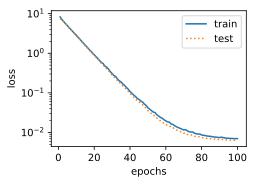

In [9]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],
            labels[:n_train], labels[n_train:])

train test
final epoch: train loss  57.4455 , test loss  75.62265
weight:  [[17.25864]] 
bias:  [0.6482247]
test train
final epoch: train loss  75.05079 , test loss  57.994816
weight:  [[16.359552]] 
bias:  [1.1923536]
train test
final epoch: train loss  69.64978 , test loss  40.703148
weight:  [[17.522919]] 
bias:  [2.4571342]
test train
final epoch: train loss  33.97489 , test loss  77.042946
weight:  [[13.552883]] 
bias:  [2.414711]
train test
final epoch: train loss  40.896378 , test loss  105.52986
weight:  [[12.932146]] 
bias:  [2.327253]
test train
final epoch: train loss  71.3574 , test loss  63.167118
weight:  [[20.352648]] 
bias:  [0.41090626]
train test
final epoch: train loss  25.204336 , test loss  47.69939
weight:  [[13.773553]] 
bias:  [2.1679652]
test train
final epoch: train loss  47.688843 , test loss  25.21234
weight:  [[13.911859]] 
bias:  [2.1726909]
train test
final epoch: train loss  61.129833 , test loss  71.374016
weight:  [[16.049854]] 
bias:  [-0.44458455]
te

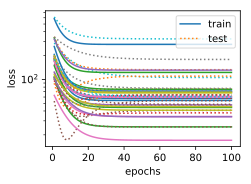

In [10]:
for _ in range(10):
    
    n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
    # = = 
    features = nd.random.normal(shape=(n_train + n_test, 1))
    poly_features = nd.concat(features, nd.power(features, 2), nd.power(features, 3))

    labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1] + 
             true_w[2] * poly_features[:, 2] + true_b)

    labels += nd.random.normal(scale=0.1, shape=labels.shape)
    
    print('train test')
    fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])
    print('test train')
    fit_and_plot(features[n_train:, :], features[:n_train, :], labels[n_train:], labels[:n_train])

final epoch: train loss  59.703007 , test loss  45.757313
weight:  [[15.383593]] 
bias:  [2.78648]


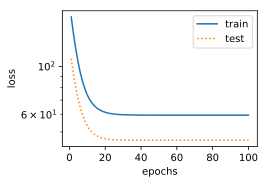

In [11]:
# 线性函数(y = ax + b)只用一个feature x去拟合，所以要改成 feature 放进去
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

final epoch: train loss  45.44893 , test loss  60.21832
weight:  [[14.58806]] 
bias:  [2.3756843]


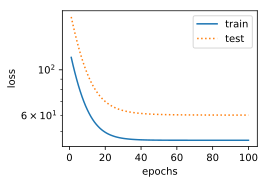

In [12]:
# why ?
fit_and_plot(features[n_train:, :], features[:n_train, :], labels[n_train:], labels[:n_train])

final epoch: train loss  1.3352103 , test loss  99.03295
weight:  [[1.1542478 0.7350687 0.5407937]] 
bias:  [3.201872]


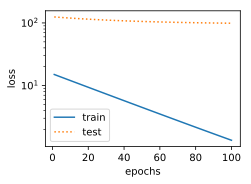

In [13]:
fit_and_plot(poly_features[2:4, :], poly_features[n_train:, :], labels[2:4], labels[n_train:])

In [14]:
# 用一个三阶多项式模型来拟合一个线性模型生成的数据

In [81]:
n_train, n_test, true_w, true_b = 10, 10, [3.5], -2.9
# = = 
features = nd.random.normal(shape=(n_train + n_test, 1))
poly_features = nd.concat(features, nd.power(features, 2), nd.power(features, 3))

labels = true_w[0] * features[:, 0] + true_b

labels += nd.random.normal(scale=0.1, shape=labels.shape)

In [82]:
# print(features, features[:, 0])

final epoch: train loss  0.9438547 , test loss  4.7016945
weight:  [[ 1.00226    -1.3523728   0.77055496]] 
bias:  [-1.4685302]


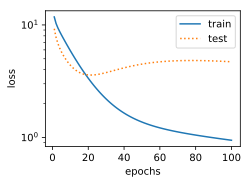

In [83]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:])